# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from IPython.display import display

from sklearn.metrics import mutual_info_score
from sklearn.metrics import accuracy_score


from sklearn.feature_extraction import DictVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn.metrics import roc_auc_score
import pickle




C:\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#!pip install scikit-learn==1.3.1

In [3]:
# https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset/code
data = pd.read_csv('loan_approval_dataset.csv')

In [4]:
df= data.copy()

# Data Processing

In [5]:
df.head().T

,0,1,2,3,4
loan_id,1,2,3,4,5
no_of_dependents,2,0,3,3,5
education,Graduate,Not Graduate,Graduate,Graduate,Not Graduate
self_employed,No,Yes,No,No,Yes
income_annum,9600000,4100000,9100000,8200000,9800000
loan_amount,29900000,12200000,29700000,30700000,24200000
loan_term,12,8,20,8,20
cibil_score,778,417,506,467,382
residential_assets_value,2400000,2700000,7100000,18200000,12400000
commercial_assets_value,17600000,2200000,4500000,3300000,8200000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


There are 13 features in the dataset, 13 numeric, 3 object type.
the taret variable is loan_status, which is categorical and has two values:
rejected or approved.
 

In [7]:
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [8]:
# As it is noticed in the above output, there are white spaces in the 
#colomn names,so string strip() method is used to remove white spaces.
df.columns = df.columns.str.strip()

In [9]:
#df = df.astype(str).apply(lambda x: x.str.lower())
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [10]:
for c in df.columns:
    print(c)
    print(df[c].unique())

loan_id
[   1    2    3 ... 4267 4268 4269]
no_of_dependents
[2 0 3 5 4 1]
education
[' Graduate' ' Not Graduate']
self_employed
[' No' ' Yes']
income_annum
[9600000 4100000 9100000 8200000 9800000 4800000 8700000 5700000  800000
 1100000 2900000 6700000 5000000 1900000 4700000  500000 2700000 6300000
 5800000 6500000 4900000 3100000 2400000 7000000 9000000 8400000 1700000
 1600000 8000000 3600000 1500000 7800000 1400000 4200000 5500000 9500000
 7300000 3800000 5100000 4300000 9300000 7400000 8500000 8800000 3300000
 3900000 8300000 5600000 5300000 2600000  700000 3500000 9900000 3000000
 6800000 2000000 1000000  300000 6600000 9400000 4400000  400000 6200000
 9700000 7100000  600000 7200000  900000  200000 1800000 4600000 2200000
 2500000 8600000 4000000 5200000 8900000 1300000 4500000 8100000 9200000
 2800000 7500000 6400000 6900000 7700000 3200000 7900000 5900000 3400000
 2100000 3700000 5400000 2300000 7600000 6000000 6100000 1200000]
loan_amount
[29900000 12200000 29700000 3070000

 34200000 35000000 36700000]
bank_asset_value
[ 8000000  3300000 12800000  7900000  5000000  5100000  4300000  6000000
   600000  1600000  3100000  6400000  1900000  4400000   700000  5900000
  6100000  5400000  8500000   300000  2600000  7200000  2500000  9700000
  9300000  1000000  5800000   900000  1400000  7100000  2900000  9000000
  5200000   800000 10900000  4900000  6500000  8200000 11700000 10500000
 11300000  3400000  6200000  8700000  4100000  4800000 11400000  4700000
  2800000 11900000  5500000  2400000  4200000  7600000  5600000  2000000
  1100000  6300000 11100000  8600000  6800000  3600000 10200000 12700000
  2100000  1300000   400000  7000000  7300000   100000   200000 11600000
  1800000  9800000  8100000  7500000 13400000  9600000  3800000  8400000
  3200000  1200000  4600000  8300000  4500000  3500000  2300000  7400000
  1700000  9500000  3000000  2200000  9200000  4000000 11200000   500000
  9400000 14400000 10000000  6600000 12500000  1500000  9100000  7700000
  780

In [11]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


The statistics shows that are not very distinct outliers in the dataset, but this will be checked with visuals too.

In [12]:
df.shape

(4269, 13)

In [13]:
#checking missing values 
df.isnull().sum()
# There are no missing values

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

In [14]:
df.duplicated().sum()
# no dublicates

0

In [15]:
categorical_columns  = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
    df[c] = df[c].str.lower()
    df[c]  = df[c].str.strip()

In [16]:
for c in df[categorical_columns]:
    print(c,"---------------------")
    print(df[c].value_counts(normalize = True))

education ---------------------
graduate        0.502225
not graduate    0.497775
Name: education, dtype: float64
self_employed ---------------------
yes    0.503631
no     0.496369
Name: self_employed, dtype: float64
loan_status ---------------------
approved    0.62216
rejected    0.37784
Name: loan_status, dtype: float64



There are categorical columns in the dataset:
education
[' Graduate' ' Not Graduate']
self_employed
[' No' ' Yes']
loan_status
[' Approved' ' Rejected']


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


# Train, test, validation splitting


The dataset was divided into  training, validation and testing sets.
df_full_train was divided into  df_train (training set), df_val (validation set)



In [18]:
df_full_train, df_test  = train_test_split(df, 
                                                test_size= 0.2,
                                                random_state = 1)

In [85]:
dict(df_full_train[df_full_train.loan_id == 914])

{'loan_id': 0    914
 Name: loan_id, dtype: int64,
 'no_of_dependents': 0    0
 Name: no_of_dependents, dtype: int64,
 'education': 0    graduate
 Name: education, dtype: object,
 'self_employed': 0    no
 Name: self_employed, dtype: object,
 'income_annum': 0    7500000
 Name: income_annum, dtype: int64,
 'loan_amount': 0    27300000
 Name: loan_amount, dtype: int64,
 'loan_term': 0    20
 Name: loan_term, dtype: int64,
 'cibil_score': 0    553
 Name: cibil_score, dtype: int64,
 'residential_assets_value': 0    11600000
 Name: residential_assets_value, dtype: int64,
 'commercial_assets_value': 0    2800000
 Name: commercial_assets_value, dtype: int64,
 'luxury_assets_value': 0    26200000
 Name: luxury_assets_value, dtype: int64,
 'bank_asset_value': 0    6100000
 Name: bank_asset_value, dtype: int64,
 'loan_status': 0    approved
 Name: loan_status, dtype: object}

In [20]:
len(df_full_train), len(df_test) 

(3415, 854)

In [21]:
# 0.25 of full train is 0.2 validation for the whole dataset
df_train, df_val  = train_test_split(df_full_train, 
                                     test_size= 0.25,
                                     random_state = 1)

In [22]:
# reset indeces
df_train = df_train.reset_index(drop =  True)
df_val = df_train.reset_index(drop =  True)
df_test = df_test.reset_index(drop =  True)

In [23]:
# get target variable churn
y_train  = (df_train.loan_status == 'approved').astype(int).values
y_val  = (df_val.loan_status == 'approved').astype(int).values
y_test  = (df_test.loan_status == 'approved').astype(int).values

In [24]:
# delete target variable from training, validation, and test datasets
del df_train['loan_status']
del df_val['loan_status']
del df_test['loan_status']

In [25]:
df_full_train.shape, df_train.shape, df_val.shape, df_test.shape

((3415, 13), (2561, 12), (2561, 12), (854, 12))

# EDA

In [26]:
# for EDA the full_train is used
df_full_train =  df_full_train.reset_index(drop = True)

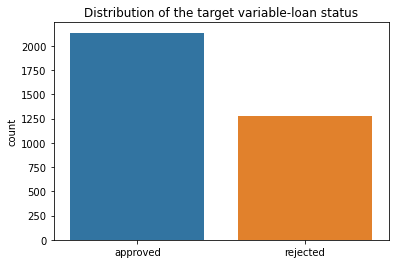

In [27]:
sns.countplot(x='loan_status', data= df_full_train)
plt.title("Distribution of the target variable-loan status")
plt.xlabel(" ")
plt.show()

In [28]:
print("The approved loans are" ,round(df_full_train[df_full_train.loan_status == 'approved'].shape[0]/df_full_train.shape[0],2) *100, "%")
print("The rejected loans are" ,round(df_full_train[df_full_train.loan_status == 'rejected'].shape[0]/df_full_train.shape[0],2) *100, "%")


The approved loans are 63.0 %
The rejected loans are 37.0 %


Text(0.5, 0, 'loan_status')

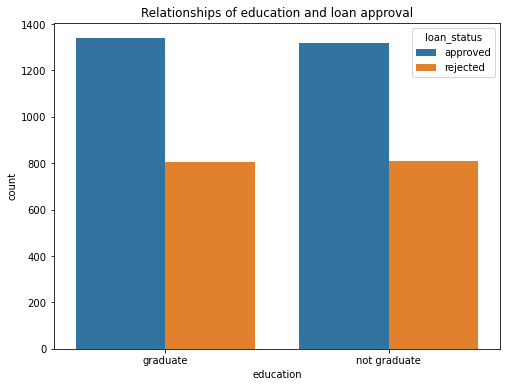

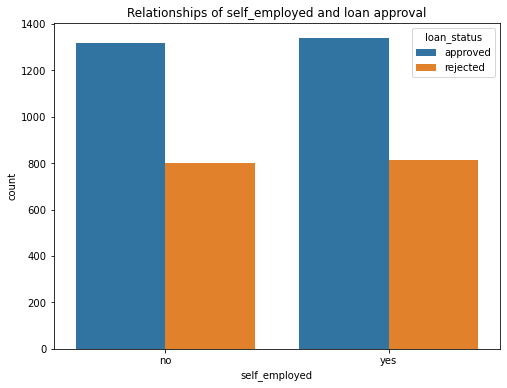

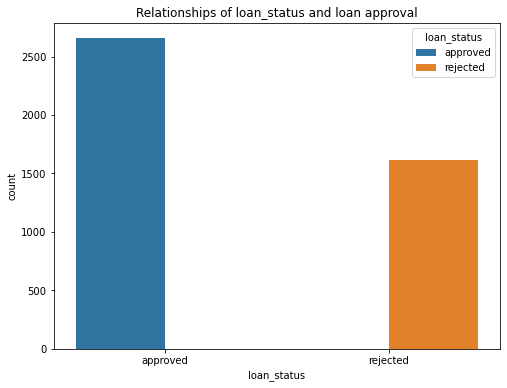

In [29]:
for c in df_full_train[categorical_columns]:
    fig, axs = plt.subplots(figsize = (8,6))
    sns.countplot(x = c,
              hue ='loan_status', 
              data = df).set(
    title =  (f"Relationships of {c} and loan approval" ) ) 
plt.xlabel(c)

The figures above represents distribution of the target variable "loan status" and categorical variables.
Comparing education varable, it was noticed that both "graduate" and "not graduate" subgroups have almost the same level of loan approval.
Similal pattern can be seen for "self-employment", so again, "yes" and "no" subgroups have almost the same laon approval.
The last plot shows the distribution of target variable- loan status, where most of laons are approved.

In [30]:
df_num = df_full_train.select_dtypes(include = 'number')
df_num = df_num.drop('loan_id', axis = 1)


The following figures represent the distribution of numeric features.
1.no_of_dependences- this shows applicants' number of dependences, where the most frequent are 4 and 0 dependences.
Income_annum- Annual income has many peaks $2M, $5M, $6M, $7M.
The loan amount (requested amount) has a right-skewed distribution. The most frequently requested amount is $ 1.1M. 
Loan term - the most frequent is 6 months.
Cibil-score-the most frequent is 550.
Residential and commercial asset values- have a right-skewed distribution with very long tales.
Luxury and bank asset values have a right skewness, short tales
Analysis of boxplots shows that almost every numeric feature does not have outliers. Only some values of asset values are a bit above the upper whisker.




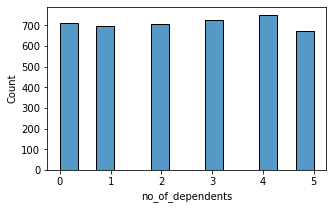

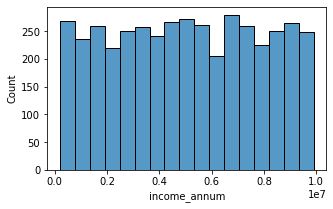

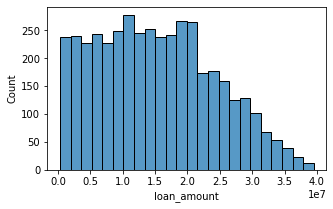

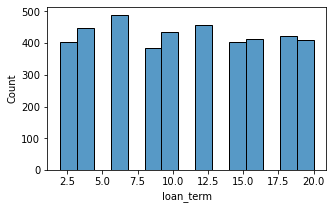

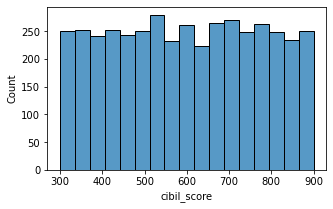

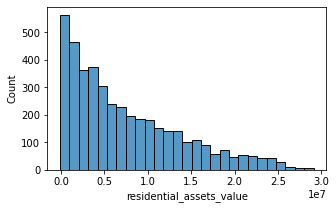

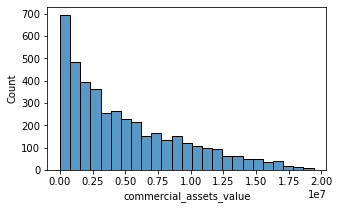

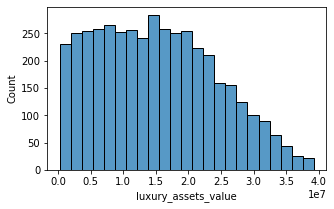

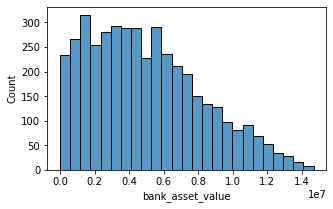

In [31]:
for c in df_num:
    fig, axs = plt.subplots(figsize = (5,3))
    sns.histplot(df[c])
    plt.xlabel(c)
     

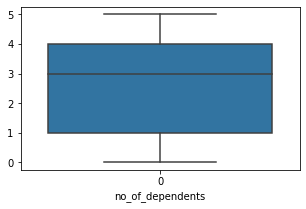

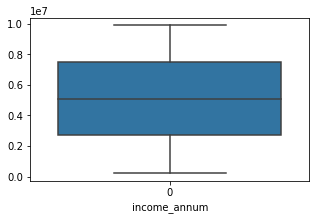

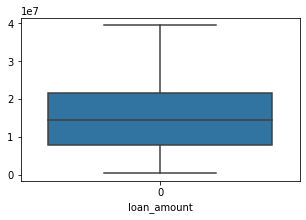

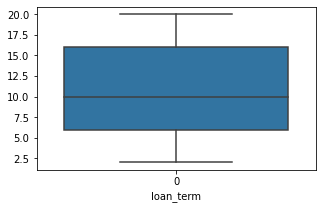

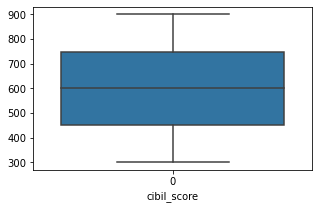

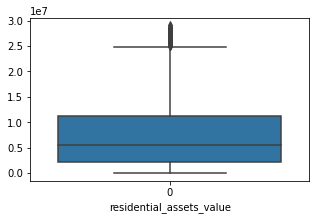

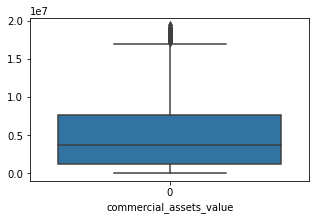

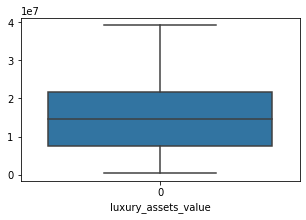

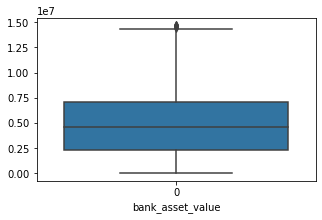

In [32]:
for c in df_num:
    fig, axs = plt.subplots(figsize = (5,3))
    sns.boxplot(df[c])
    plt.xlabel(c)

In [ ]:
df_full_train.loan_status.value_counts()

In [ ]:
#number of unique values of categorical variables
df_full_train[categorical_columns].nunique()

# Feature importance

In [ ]:
#using mutualinfo_score function for categorical variables

In [ ]:
def mutual_info_loan(series):
    return mutual_info_score(series, df_full_train.loan_status)

In [ ]:
selected_categorical_columns  = ['education', 'self_employed']

In [ ]:
mi = df_full_train[selected_categorical_columns].apply(mutual_info_loan)
mi.sort_values(ascending  = False)
# mi scores are low, so education and self-imploment are not informative for loan aproval

In [ ]:
df_full_train.loan_status = (df_full_train.loan_status == 'approved').astype(int).values

In [ ]:
df_full_train.loan_status

In [ ]:
# using correlation for numeric variables,
# a comperativley higher correleation shows cibil_score
df_num.corrwith(df_full_train.loan_status)

# X_Val, X_train

In [34]:
dv = DictVectorizer(sparse = False)

train_dict = df_train.to_dict(orient = 'records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient = 'records')
X_val = dv.transform(val_dict)

In [35]:
dv.get_feature_names_out()

array(['bank_asset_value', 'cibil_score', 'commercial_assets_value',
       'education=graduate', 'education=not graduate', 'income_annum',
       'loan_amount', 'loan_id', 'loan_term', 'luxury_assets_value',
       'no_of_dependents', 'residential_assets_value', 'self_employed=no',
       'self_employed=yes'], dtype=object)

In [39]:
rf =  RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

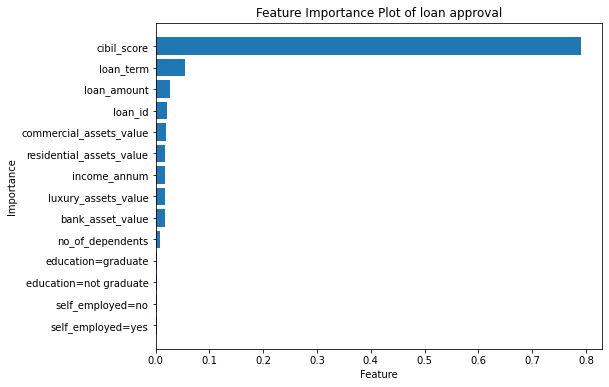

In [40]:
# Feature importance with RandomForest Classifier
feature_importances = rf.feature_importances_
sorted_feature_importances = np.sort(feature_importances)
sorted_feature_names = np.array(dv.get_feature_names_out())[np.argsort(feature_importances)]

fig, axs = plt.subplots(figsize = (8,6))
plt.barh(y=sorted_feature_names, width =sorted_feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance Plot of loan approval')
plt.show()

The most important features are 'cibil_score',  
'loan_term', 'loan_amount','income annum' according to RandomForest Classifier.
The most frequent cibil score is 600-700, loan term - 6 months, as shows in the figures. 


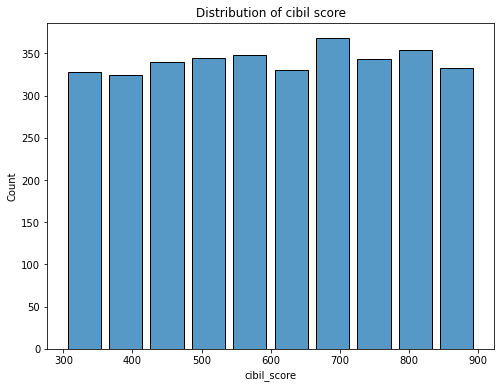

In [42]:
fig, axs = plt.subplots(figsize = (8,6))
sns.histplot(df_full_train.cibil_score, bins = 10, shrink  = 0.8 )
plt.title("Distribution of cibil score")
plt.show()

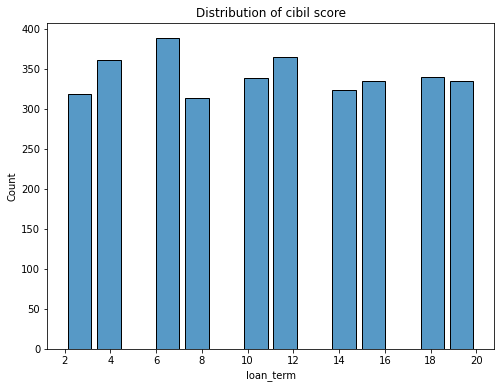

In [43]:
fig, axs = plt.subplots(figsize = (8,6))
sns.histplot(df_full_train.loan_term , shrink = 0.8 )
plt.title("Distribution of cibil score")
axs.set_xticks(df_full_train.loan_term.unique())
plt.show()

In [44]:
df_full_train.loan_term.value_counts()

6     388
12    365
4     361
18    339
10    338
20    335
16    334
14    323
2     319
8     313
Name: loan_term, dtype: int64

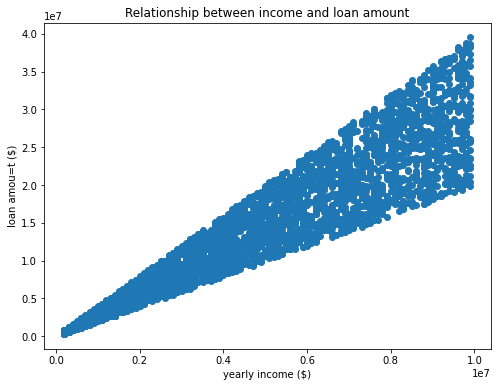

In [45]:
fig, axs = plt.subplots(figsize = (8,6))
plt.scatter(x= df_full_train.income_annum, y=df_full_train.loan_amount )
plt.xlabel("yearly income ($)")
plt.ylabel("loan amou=t ($)")
plt.title("Relationship between income and loan amount")
plt.show()

The scatter plot of yearly income and loan amount represents a linear relationship, as higher the income is, as higher the requested amount is.

# Model training

## LogisticRegression

In [46]:
model_log = LogisticRegression(max_iter=1000)
model_log.fit(X_train, y_train)
model_log.coef_# weights

array([[ 2.63051694e-08,  5.46387228e-03,  1.38365149e-08,
         7.48595751e-07,  2.13767144e-07, -4.18049661e-07,
         6.12315486e-08, -4.65259341e-04, -1.10889357e-05,
        -9.11225126e-09,  1.45740945e-06, -1.56808490e-08,
         3.81552290e-07,  5.80810603e-07]])

In [47]:
model_log.intercept_[0]

9.623628952270208e-07

In [48]:
print(model_log.score)

<bound method ClassifierMixin.score of LogisticRegression(max_iter=1000)>


In [49]:
model_log.predict(X_train)# predicting labels

array([0, 1, 1, ..., 1, 0, 1])

In [50]:
model_log.predict_proba(X_train)# predicting probabilities

array([[0.75478608, 0.24521392],
       [0.41286868, 0.58713132],
       [0.14202951, 0.85797049],
       ...,
       [0.29312325, 0.70687675],
       [0.71236117, 0.28763883],
       [0.40179244, 0.59820756]])

In [51]:
model_log.predict_proba(X_train)[:, 1]  

array([0.24521392, 0.58713132, 0.85797049, ..., 0.70687675, 0.28763883,
       0.59820756])

In [52]:
y_pred = model_log.predict_proba(X_val)[:, 1]
y_pred 

array([0.24521392, 0.58713132, 0.85797049, ..., 0.70687675, 0.28763883,
       0.59820756])

In [53]:
approve_decision =  (y_pred >= 0.5)
approve_decision

array([False,  True,  True, ...,  True, False,  True])

In [54]:
# finding laons that are going to be approved
df_val[approve_decision].loan_id

1       2617
2       2611
3       4268
6        829
7        108
        ... 
2555    2854
2556    3757
2557    1469
2558    2946
2560    3567
Name: loan_id, Length: 2010, dtype: int64

In [55]:
(y_val == approve_decision).mean().round(3)
# so the probability of loans to be acceped is abouut 75 %

0.752

In [56]:
df_pred  = pd.DataFrame()
df_pred['loan_id'] = df_val.loan_id
df_pred['propability']= y_pred
df_pred['prediction']= approve_decision.astype(int)
df_pred['actual_values'] = y_val
df_pred['correct'] = (df_pred['prediction'] == df_pred['actual_values'])

In [57]:
df_pred 

,loan_id,propability,prediction,actual_values,correct
0,3114,0.245214,0,0,True
1,2617,0.587131,1,1,True
2,2611,0.857970,1,1,True
3,4268,0.777466,1,1,True
4,3576,0.415261,0,1,False
...,...,...,...,...,...
2556,3757,0.524931,1,1,True
2557,1469,0.821862,1,1,True
2558,2946,0.706877,1,1,True
2559,3017,0.287639,0,0,True


In [58]:
df_full_train[df_full_train.loan_id == 3576 ]

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
1026,3576,4,not graduate,no,7400000,15400000,6,677,22000000,13500000,28900000,7400000,approved


In [61]:
dicts_test = df_test.to_dict(orient = 'records')

In [62]:
X_test = dv.transform(dicts_test )

In [63]:
X_test

array([[7.70e+06, 3.83e+02, 1.59e+07, ..., 7.80e+06, 0.00e+00, 1.00e+00],
       [1.00e+07, 4.58e+02, 9.20e+06, ..., 6.10e+06, 1.00e+00, 0.00e+00],
       [9.60e+06, 3.60e+02, 0.00e+00, ..., 1.40e+07, 1.00e+00, 0.00e+00],
       ...,
       [2.00e+06, 8.20e+02, 2.40e+06, ..., 2.70e+06, 0.00e+00, 1.00e+00],
       [0.00e+00, 7.46e+02, 0.00e+00, ..., 4.00e+05, 0.00e+00, 1.00e+00],
       [5.90e+06, 8.48e+02, 1.10e+06, ..., 1.05e+07, 1.00e+00, 0.00e+00]])

In [64]:
y_pred  = model_log.predict_proba(X_test)[:, 1] 

In [65]:
approve_decision =  (y_pred >= 0.5)
approve_decision

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True, False, False,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True, False,  True,  True, False, False,  True,
        True,  True, False,  True,  True, False,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True, False, False,  True, False,  True,
       False,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True, False,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,

In [66]:
(approve_decision == y_test).mean().round(3)

0.753

In [67]:
customer  = dicts_test[5]
customer

{'loan_id': 574,
 'no_of_dependents': 3,
 'education': 'graduate',
 'self_employed': 'no',
 'income_annum': 3100000,
 'loan_amount': 11000000,
 'loan_term': 2,
 'cibil_score': 543,
 'residential_assets_value': 5900000,
 'commercial_assets_value': 2200000,
 'luxury_assets_value': 9000000,
 'bank_asset_value': 2400000}

In [68]:
X_loan_id_574  = dv.transform([customer])
X_loan_id_574.shape

(1, 14)

In [69]:
model_log.predict_proba(X_loan_id_574 )[0,1]

0.8804234911816476

In [70]:
y_test[5]
# As it can be noticed, the model predicted of acception and
# the actual value was 1 == 'approved'

1

In [71]:
df[df.loan_id == 574].loan_status

573    approved
Name: loan_status, dtype: object

In [72]:
df_pred_test  = pd.DataFrame()
df_pred_test['loan_id'] = df_test.loan_id
df_pred_test['propability']= y_pred
df_pred_test['prediction']= approve_decision.astype(int)
df_pred_test['actual_values'] = y_test
df_pred_test['correct'] = (df_pred_test['prediction'] == df_pred_test['actual_values'])


In [73]:
df_pred_test[df_pred_test.prediction != df_pred_test.actual_values].shape[0]/df_pred_test.shape[0]

0.24707259953161592

So, about 24.7% are not correctly classified cases of the testing dataset. Here are the examples of those lead_ids.
Therefore, let's try another model.

In [74]:
df_pred_test[df_pred_test.prediction != df_pred_test.actual_values]

,loan_id,propability,prediction,actual_values,correct
8,2576,0.547320,1,0,False
9,1761,0.639318,1,0,False
10,3161,0.475624,0,1,False
14,1834,0.587217,1,0,False
15,1709,0.855899,1,0,False
...,...,...,...,...,...
834,1671,0.708924,1,0,False
835,3474,0.612992,1,0,False
839,3774,0.254731,0,1,False
845,3428,0.544097,1,0,False


## DesisionTree

In [75]:
for d in [1,2,3,4,5,6,7,8,9,10,15,20,25, None]:
    dt = DecisionTreeClassifier(max_depth = d)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (d, auc))

   1 -> 0.962
   2 -> 0.992
   3 -> 0.996
   4 -> 0.997
   5 -> 0.998
   6 -> 0.999
   7 -> 0.999
   8 -> 1.000
   9 -> 1.000
  10 -> 1.000
  15 -> 1.000
  20 -> 1.000
  25 -> 1.000
None -> 1.000


In [76]:
scores = []
for d in [6,7,8,9,10,15]:
    for s in [1,2,5,10,15,20,100]:
        dt = DecisionTreeClassifier(max_depth = d, min_samples_leaf = s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d,s,auc))
    
          

In [77]:
cols  = ["max_depth", "min_samples_leaf", "auc" ]
df_scores = pd.DataFrame(scores, columns  = cols)
df_scores.sort_values(by= "auc", ascending = False)

,max_depth,min_samples_leaf,auc
35,15,1,1.000000
36,15,2,0.999934
28,10,1,0.999897
21,9,1,0.999813
29,10,2,0.999797
37,15,5,0.999753
22,9,2,0.999686
30,10,5,0.999677
23,9,5,0.999550
14,8,1,0.999537


In [78]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf',
                columns=["max_depth"],
                values=['auc'])

df_scores_pivot.round(3) 

auc                                   
max_depth            6      7      8      9      10     15
min_samples_leaf                                          
1                 0.999  0.999  1.000  1.000  1.000  1.000
2                 0.999  0.999  0.999  1.000  1.000  1.000
5                 0.999  0.999  0.999  1.000  1.000  1.000
10                0.999  0.999  0.999  0.999  0.999  0.999
15                0.998  0.999  0.999  0.999  0.999  0.999
20                0.998  0.999  0.999  0.999  0.999  0.999
100               0.996  0.996  0.996  0.996  0.996  0.996

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

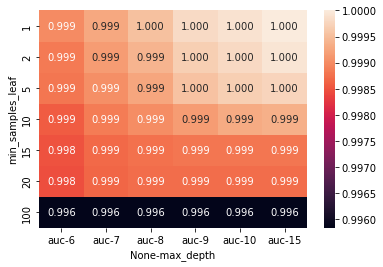

In [79]:
sns.heatmap(df_scores_pivot, annot = True, fmt = '.3f')

In [80]:
# using best parameters
dt = DecisionTreeClassifier(max_depth = 15, min_samples_leaf = 1)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15)

In [81]:
y_pred = dt.predict_proba(X_val)[:,1]

In [82]:
print("auc: ",roc_auc_score(y_val, y_pred)) 
print("predicted probability is: ", rf.predict_proba(X_val[[0]]) )

auc:  1.0
predicted probability is:  [[1. 0.]]


In [84]:
# let's make the prediction on the testing set: X_test
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,

In [204]:
'''
k = {"loan_id":262211,
             " no_of_dependents":1,
             " education":" graduate",
             " self_employed":" yes",
             " income_annum":5800000,
             " loan_amount":13000000,
             " loan_term":12,
             " cibil_score":862,
             " residential_assets_value":11300000,
             " commercial_assets_value":8400000,
             " luxury_assets_value":12000000,
             " bank_asset_value":3900000
              }

k_val = dv.transform(k)

k_p= dt.predict(k_val)
k_p
'''

array([1])

In [234]:
accuracy = accuracy_score(y_test, y_pred)

In [236]:
print("The accuracy score for the testing set is", round(accuracy,2)* 100, "%" )

The accuracy score for the testing set is 98.0 %


## RandomForest Classifier

In [263]:
rf = RandomForestClassifier(n_estimators= 10, random_state  = 1)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [264]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.999992824892145

In [258]:
rf.predict_proba(X_val[[0]])

array([[0.82838211, 0.17161789]])

In [259]:
scores  = []
for n in range(10,201,10):
    rf = RandomForestClassifier(n_estimators= n, random_state  = 1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

In [242]:
df_scores = pd.DataFrame(scores, columns = ["n_estimators", "auc"])
df_scores

,n_estimators,auc
0,10,0.999993
1,20,1.000000
2,30,1.000000
3,40,1.000000
4,50,1.000000
5,60,1.000000
6,70,1.000000
7,80,1.000000
8,90,1.000000
9,100,1.000000


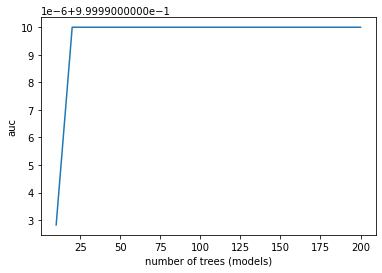

In [243]:
plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel("number of trees (models)")
plt.ylabel('auc')
plt.show()

In [244]:
n_estimators = 20

In [245]:
for d in [1,2,3,4,5,6,7,8,9,10,15,20,25, None]:
    dt = RandomForestClassifier(max_depth = d,random_state=1,
                                n_estimators =n_estimators,
                                    n_jobs=-1)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (d, auc))

   1 -> 0.993
   2 -> 0.991
   3 -> 0.996
   4 -> 0.996
   5 -> 0.998
   6 -> 0.999
   7 -> 1.000
   8 -> 1.000
   9 -> 1.000
  10 -> 1.000
  15 -> 1.000
  20 -> 1.000
  25 -> 1.000
None -> 1.000


In [246]:
scores  = []
for d in [5,6,7,8,9,10,15]:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators= n,
                                    max_depth = d,
                                    random_state  = 1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((d, n, auc))

In [247]:
cols  =  ["max_depth", "n_estimators", "auc"]
df_scores = pd.DataFrame(scores, columns =cols )
df_scores

,max_depth,n_estimators,auc
0,5,10,0.997342
1,5,20,0.998039
2,5,30,0.998720
3,5,40,0.998892
4,5,50,0.998853
...,...,...,...
135,15,160,1.000000
136,15,170,1.000000
137,15,180,1.000000
138,15,190,1.000000


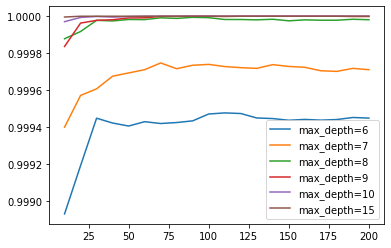

In [248]:
for d in[6,7,8,9,10,15]:
    df_subset = df_scores[df_scores.max_depth == d]
    plt.plot(df_subset.n_estimators, df_subset.auc,
            label = 'max_depth=%d' % d)
plt.legend()

In [249]:
df_scores.head()

,max_depth,n_estimators,auc
0,5,10,0.997342
1,5,20,0.998039
2,5,30,0.998720
3,5,40,0.998892
4,5,50,0.998853


In [250]:
max_depth = 10
scores = []
for s in [1,3, 5,10,50]:
    for n in range(10,201,10):
        rf = RandomForestClassifier(n_estimators= n,
                                    max_depth = max_depth,
                                    min_samples_leaf = s,
                                    random_state  = 1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        scores.append((s, n, auc))

In [251]:
cols  =  ["min_samples_leaf", "n_estimators", "auc"]
df_scores = pd.DataFrame(scores, columns =cols )
df_scores

,min_samples_leaf,n_estimators,auc
0,1,10,0.999971
1,1,20,0.999993
2,1,30,0.999999
3,1,40,0.999995
4,1,50,0.999998
...,...,...,...
95,50,160,0.997070
96,50,170,0.997084
97,50,180,0.997058
98,50,190,0.996878


In [252]:
colors = ["blue", "orange","red","grey","black"]
min_samples_leaf = [1,3,5,10,50]
zip(min_samples_leaf, colors) # <zip at 0x23bc69fbdc0> 
# to show the values
list(zip(min_samples_leaf, colors) )

[(1, 'blue'), (3, 'orange'), (5, 'red'), (10, 'grey'), (50, 'black')]

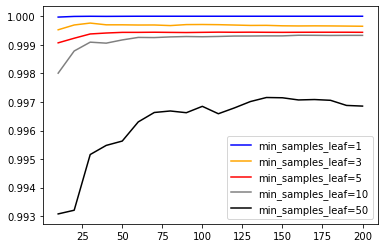

In [253]:
for s, col in zip(min_samples_leaf, colors):
    df_subset = df_scores[df_scores.min_samples_leaf  == s]
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color = col,
            label = 'min_samples_leaf=%d' % s)
plt.legend()

In [254]:
min_samples_leaf  = 1 

Although Random Forest performs pretty well the hyperparameter tuning for getting better results.

In [260]:
# the final model with best parameters
rf_final = RandomForestClassifier(n_estimators= 20,
                                    max_depth = max_depth,
                                  min_samples_leaf = min_samples_leaf, 
                                    random_state = 1,
                                    n_jobs = -1)
rf_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=20, n_jobs=-1, random_state=1)

In [262]:
y_pred_fin= rf_final.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred_fin)

0.9924896105318372

 The final model of RandomForest Classifier perfores well on testing data too.

## Xgboost

In [265]:
features = dv.get_feature_names_out()
dtrain = xgb.DMatrix(X_train, label = y_train, feature_names = features)
dval = xgb.DMatrix(X_val, label = y_val, feature_names = features)
 

In [266]:
# tuning eta

xgb_params = {
    'eta': 0.5,
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': 1,
    'verbosity': 2,
}

model  = xgb.train(xgb_params, dtrain, num_boost_round = 200)

[22:37:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 32 extra nodes, 0 pruned nodes, max_depth=10
[22:37:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 46 extra nodes, 0 pruned nodes, max_depth=10
[22:37:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 40 extra nodes, 0 pruned nodes, max_depth=10
[22:37:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 36 extra nodes, 0 pruned nodes, max_depth=10
[22:37:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c

[22:37:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[22:37:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 8 extra nodes, 0 pruned nodes, max_depth=3
[22:37:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[22:37:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[22:37:37] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgb

[22:37:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[22:37:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[22:37:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[22:37:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 6 extra nodes, 0 pruned nodes, max_depth=3
[22:37:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgb

[22:37:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[22:37:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[22:37:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[22:37:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/tree/updater_prune.cc:98: tree pruning end, 4 extra nodes, 0 pruned nodes, max_depth=2
[22:37:38] INFO: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgb

In [267]:
y_pred  = model.predict(dval)
y_pred

array([2.6838885e-05, 9.9994957e-01, 9.9996471e-01, ..., 9.9994087e-01,
       1.5383074e-04, 9.9997377e-01], dtype=float32)

In [268]:
roc_auc_score(y_val, y_pred)

1.0

In [269]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [270]:
scores ={}
#etas = ['eta=1.0', 'eta=0.7','eta=0.5']

In [283]:
%%capture output

xgb_params = {
    'eta':0.5,
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}


model  = xgb.train(xgb_params, dtrain,
                   num_boost_round = 200,
                   verbose_eval  = 5,
                  evals = watchlist)
model

In [284]:
def parse_xgb_output(output):
    results = []
    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line =  line.split('\t')
        
        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val  = float(val_line.split(':')[1])
        
        results.append((it, train, val))
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns = columns)
    return df_results

In [285]:
df_scores  = parse_xgb_output(output)

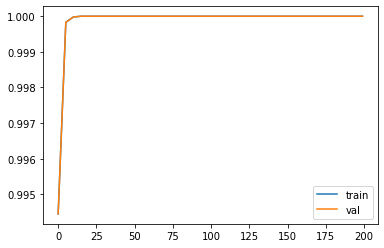

In [286]:
plt.plot(df_scores.num_iter, df_scores.train_auc, label = 'train')
plt.plot(df_scores.num_iter, df_scores.val_auc, label = 'val')
plt.legend()

In [287]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)

In [288]:
# key = 'eta=0.7', value is output
scores['eta=0.5'].head()

,num_iter,train_auc,val_auc
0,0,0.99445,0.99445
1,5,0.99983,0.99983
2,10,0.99998,0.99998
3,15,1.00000,1.00000
4,20,1.00000,1.00000


In [289]:
scores.keys()

dict_keys(['eta=1.0', 'eta=0.7', 'eta=0.5'])

In [290]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.5'

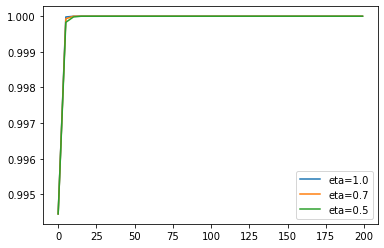

In [291]:
for key, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label = key)
plt.legend()

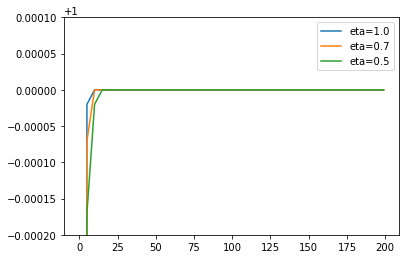

In [292]:
etas = ['eta=1.0', 'eta=0.7','eta=0.5']

for eta in etas:
    df_score = scores[eta]
    plt.plot(df_score.num_iter, df_score.val_auc, label = eta)
    
plt.ylim(0.9998,1.0001)
plt.legend()

In [293]:
# the best eta is 0.7, though other values were good too

In [295]:
scores ={}
# ['max_depth=6',7, 9, 10, 15]

In [296]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth':15,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}


model  = xgb.train(xgb_params, dtrain,
                   num_boost_round = 200,
                   verbose_eval  = 5,
                  evals = watchlist)
model

In [297]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=15'

In [298]:
df_scores  = parse_xgb_output(output)

In [299]:
scores.keys()

dict_keys(['max_depth=15'])

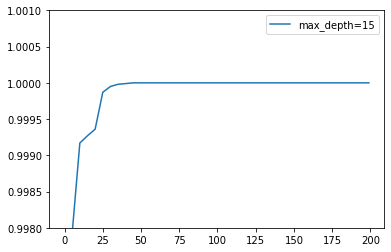

In [300]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label = max_depth)
plt.ylim(0.998, 1.001)
plt.legend()

In [302]:
# max _depth 9 shows the same auc curve as 10,15, so let's choose 9.

In [303]:
# the final xgb model
xgb_params = {
    'eta': 0.7,
    'max_depth': 9,
      
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model_xgb_best  = xgb.train(xgb_params, dtrain,
                   num_boost_round = 175)
model_xgb_best 


## Comparing the models


In [305]:
y_pred  = model_log.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred)
 

0.8378147821525941

In [307]:
y_pred  = dt.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred)

0.9934982967612526

In [308]:
y_pred  = rf_final.predict_proba(X_test)[:,1]
roc_auc_score(y_test, y_pred)

0.9924896105318372

In [310]:
y_pred  = model_xgb_best.predict(dval)
roc_auc_score(y_val, y_pred)

1.0

Based on auc values, it can be noticed that Desicion Tree Classifier 
 and XGBoost Classifier perform better (with auc = 1.0) than
Logistic regression (with auc = 0.84) and Random forest Classifier((with auc = 0.9924))for training faster this dataset, Decision Tree  Classifier was selected at the best model considering the computational power of local computers.

# Saving the model 

In [316]:
output_file_dt = 'model_dt.bin'

In [317]:
 with open(output_file_dt, 'wb') as f_out:
    pickle.dump((dv, dt), f_out)

In [318]:
output_file_xg = 'model_xg.bin'

In [319]:
 with open(output_file_xg, 'wb') as f_out:
    pickle.dump((dv, model_xgb_best), f_out)

 #  Deployement 

In [53]:
import requests
url =  "http://127.0.0.1:9696/predict_test"

In [54]:
applicant = {"loan_id":262211,
             " no_of_dependents":1,
             " education":" graduate",
             " self_employed":" yes",
             " income_annum":5800000,
             " loan_amount":13000000,
             " loan_term":12,
             " cibil_score":862,
             " residential_assets_value":11300000,
             " commercial_assets_value":8400000,
             " luxury_assets_value":12000000,
             " bank_asset_value":3900000
              }



In [55]:
print(applicant)

{'loan_id': 262211, ' no_of_dependents': 1, ' education': ' graduate', ' self_employed': ' yes', ' income_annum': 5800000, ' loan_amount': 13000000, ' loan_term': 12, ' cibil_score': 862, ' residential_assets_value': 11300000, ' commercial_assets_value': 8400000, ' luxury_assets_value': 12000000, ' bank_asset_value': 3900000}


In [56]:
#requests.post(url, json = applicant).json()
response = requests.post(url, json=applicant)
print(response)

<Response [404]>


In [63]:
import requests
url = "http://localhost:9696/predict"

customer =  {"no_of_dependents": 1,
             "education": "graduate",
             "self_employed":"yes",
             "income_annum":780000000,
             "loan_amount":27300000,
             'loan_term':10,
             "cibil_score":555,
             "residential_assets_value":11600000,
             "commercial_assets_value" :2800000,
             "luxury_assets_value" :26200000,
             "bank_asset_value" :500000
              
  }
customer
response = requests.post(url, json = customer).json()
response 

if response['loan'] == True:
    print("Approve the loan for the customer %s" % ("N12222222223"))
else:
    print("Reject the loan for the customer %s" % ("N12222222223"))



JSONDecodeError: Expecting value: line 1 column 1 (char 0)